In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
# import multifunctional libraries
import os
import numpy as np
import pandas as pd
import string
import pickle

# import image plots
import seaborn as sns
import matplotlib.pyplot as plt
# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.decomposition import PCA


In [2]:
os.getcwd()

'c:\\Users\\gabi1\\git\\ACTC_MD_ML\\gaby_notebooks'

In [3]:
os.chdir('..\\data\\generated')
os.getcwd()

'c:\\Users\\gabi1\\git\\ACTC_MD_ML\\data\\generated'

In [4]:
data1 = pd.read_csv('1-0-hgk-MD-ActCoeff-processed_Activity.csv', encoding='latin1')
data1 = pd.DataFrame(data1)
data1.head()

# Name of the polymer CounterIon Co-Ion  salt  Water-per-ion  \
0  1          PSbNMP_RCE         I-     K+    KI              6   
1  2          PSbNMP_RCE         I-     K+    KI              6   
2  3          PSbNMP_RCE         I-     K+    KI              6   
3  4          PSbNMP_RCE         I-     K+    KI              6   
4  5            PVAS_RCE        Na+    Cl-  NaCl            113   

   concentration of salt (M)  gr_minima (Ion_H2O)  gr_peak_position (Ion_H2O)  \
0                       0.02                 4.45                        3.65   
1                       0.20                 4.45                        3.65   
2                       0.50                 4.45                        3.65   
3                       1.00                 4.55                        3.65   
4                       0.02                 3.15                        2.35   

   gr_peak_height (Ion_H2O)  Nr_(Ion_H2O)  gr_minima (CG_H2O)  \
0                      6.50          4.70                5.50   
1                      6.30          4.60                5.50   
2                      6.20          4.60                5.50   
3                      6.00          4.70                5.00   
4                      8.55          5.38                3.37   

   gr_peak_position (CG_H2O)  gr_peak_hight (CG_H2O)  Nr_(CG_H2O)  \
0                       3.55                    2.30         6.10   
1                       3.55                    1.90         5.00   
2                       3.55                    1.80         4.50   
3                       3.55                    1.50         3.00   
4                       2.76                    1.83         2.98   

   gr_minima (CG_Ion)  gr_peak_position (CG_Ion)  gr_peak_height (CG_Ion)  \
0                6.15                       4.15                     5.80   
1                6.15                       4.15                     5.80   
2                6.15                       4.15                     5.60   
3                6.15                       4.15                     5.10   
4                3.06                       2.35                     6.71   

   Nr_(CG_Ion)  Experimental activity co.  
0         1.90                   0.300000  
1         2.00                   0.319000  
2         2.20                   0.476000  
3         2.50                   0.663000  
4         0.13                   0.280899

In [5]:
data2 = pd.read_csv('1.0-hkg-MD-ActCoeff-processed-deletedNonZeros.csv', encoding='latin1')
data2 = pd.DataFrame(data2)
data2.head()

# Name of the polymer CounterIon Co-Ion  salt  Water-per-ion  \
0   2          PSbNMP_RCE         I-     K+    KI              6   
1   3          PSbNMP_RCE         I-     K+    KI              6   
2   4          PSbNMP_RCE         I-     K+    KI              6   
3   5          PSbNMP_RCE         I-     K+    KI              6   
4  12            PVAS_RCE        Na+    Cl-  NaCl            113   

   concentration_of_salt_M  gr_minima_Ion_H2O  gr_peak_position_Ion_H2O  \
0                     0.02               4.45                      3.65   
1                     0.20               4.45                      3.65   
2                     0.50               4.45                      3.65   
3                     1.00               4.55                      3.65   
4                     0.02               3.15                      2.35   

   gr_peak_height_Ion_H2O  Nr_Ion_H2O  gr_minima_CG_H2O  \
0                    6.50        4.70              5.50   
1                    6.30        4.60              5.50   
2                    6.20        4.60              5.50   
3                    6.00        4.70              5.00   
4                    8.55        5.38              3.37   

   gr_peak_position_CG_H2O  gr_peak_height_CG_H2O  Nr_CG_H2O_  \
0                     3.55                   2.30        6.10   
1                     3.55                   1.90        5.00   
2                     3.55                   1.80        4.50   
3                     3.55                   1.50        3.00   
4                     2.76                   1.83        2.98   

   gr_minima_CG_Ion  gr_peak_position_CG_Ion  gr_peak_height_CG_Ion  \
0              6.15                     4.15                   5.80   
1              6.15                     4.15                   5.80   
2              6.15                     4.15                   5.60   
3              6.15                     4.15                   5.10   
4              3.06                     2.35                   6.71   

   Nr_CG_Ion  Exp_act_coeff  
0       1.90       0.300000  
1       2.00       0.319000  
2       2.20       0.476000  
3       2.50       0.663000  
4       0.13       0.280899

In [6]:
data3 = pd.read_csv('1.0-hkg-MD-ActCoeff-processed.csv', encoding='latin1')
data3 = pd.DataFrame(data3)
data3.head()

# Name of the polymer CounterIon Co-Ion salt  Water-per-ion  \
0  1          PSbNMP_RCE         I-     K+   KI              6   
1  2          PSbNMP_RCE         I-     K+   KI              6   
2  3          PSbNMP_RCE         I-     K+   KI              6   
3  4          PSbNMP_RCE         I-     K+   KI              6   
4  5          PSbNMP_RCE         I-     K+   KI              6   

   concentration_of_salt_M  gr_minima_Ion_H2O  gr_peak_position_Ion_H2O  \
0                     0.00               4.45                      3.65   
1                     0.02               4.45                      3.65   
2                     0.20               4.45                      3.65   
3                     0.50               4.45                      3.65   
4                     1.00               4.55                      3.65   

   gr_peak_height_Ion_H2O  Nr_Ion_H2O  gr_minima_CG_H2O  \
0                     6.5         4.7               5.4   
1                     6.5         4.7               5.5   
2                     6.3         4.6               5.5   
3                     6.2         4.6               5.5   
4                     6.0         4.7               5.0   

   gr_peak_position_CG_H2O  gr_peak_height_CG_H2O  Nr_CG_H2O_  \
0                     3.55                   2.16         5.3   
1                     3.55                   2.30         6.1   
2                     3.55                   1.90         5.0   
3                     3.55                   1.80         4.5   
4                     3.55                   1.50         3.0   

   gr_minima_CG_Ion  gr_peak_position_CG_Ion  gr_peak_height_CG_Ion  \
0              6.25                     4.15                    5.6   
1              6.15                     4.15                    5.8   
2              6.15                     4.15                    5.8   
3              6.15                     4.15                    5.6   
4              6.15                     4.15                    5.1   

   Nr_CG_Ion Exp_act_coeff  
0        1.9             -  
1        1.9         0.300  
2        2.0         0.319  
3        2.2         0.476  
4        2.5         0.663

In [8]:
#Change directory
os.chdir('../')
os.getcwd()


'c:\\Users\\gabi1\\git\\ACTC_MD_ML'

In [9]:
#load polimers
from src.polymerSMILES import polymers

polymers_dict = polymers.get_data()
polymers_dict

{'AR103': <rdkit.Chem.rdchem.Mol at 0x157ef89aac0>,
 'AR204': <rdkit.Chem.rdchem.Mol at 0x157ef89ab30>,
 'CR61': <rdkit.Chem.rdchem.Mol at 0x157ef89aba0>,
 'NAFION': <rdkit.Chem.rdchem.Mol at 0x157ef89ac10>,
 'PVAS_BCE': <rdkit.Chem.rdchem.Mol at 0x157ef89add0>,
 'PVAS_RCE': <rdkit.Chem.rdchem.Mol at 0x157ef89ad60>,
 'PSbNMP_BCE': <rdkit.Chem.rdchem.Mol at 0x157ef89ac80>,
 'PSbNMP_RCE': <rdkit.Chem.rdchem.Mol at 0x157ef89acf0>,
 'CEM1': <rdkit.Chem.rdchem.Mol at 0x157ef89ae40>,
 'CEM2': <rdkit.Chem.rdchem.Mol at 0x157ef89aeb0>,
 'CEM3': <rdkit.Chem.rdchem.Mol at 0x157ef89af20>,
 'XLAPn4_9p': <rdkit.Chem.rdchem.Mol at 0x157ef89af90>,
 'XLAPn4_45p': <rdkit.Chem.rdchem.Mol at 0x157ef8b5040>}

In [10]:
from src.dataProcessing import *

In [11]:
preprocess = DataPreprocessing()

In [12]:
TanimotoIndex = preprocess.computeTanimotoSimilarity(polymers_dict, 'Tanimoto')

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

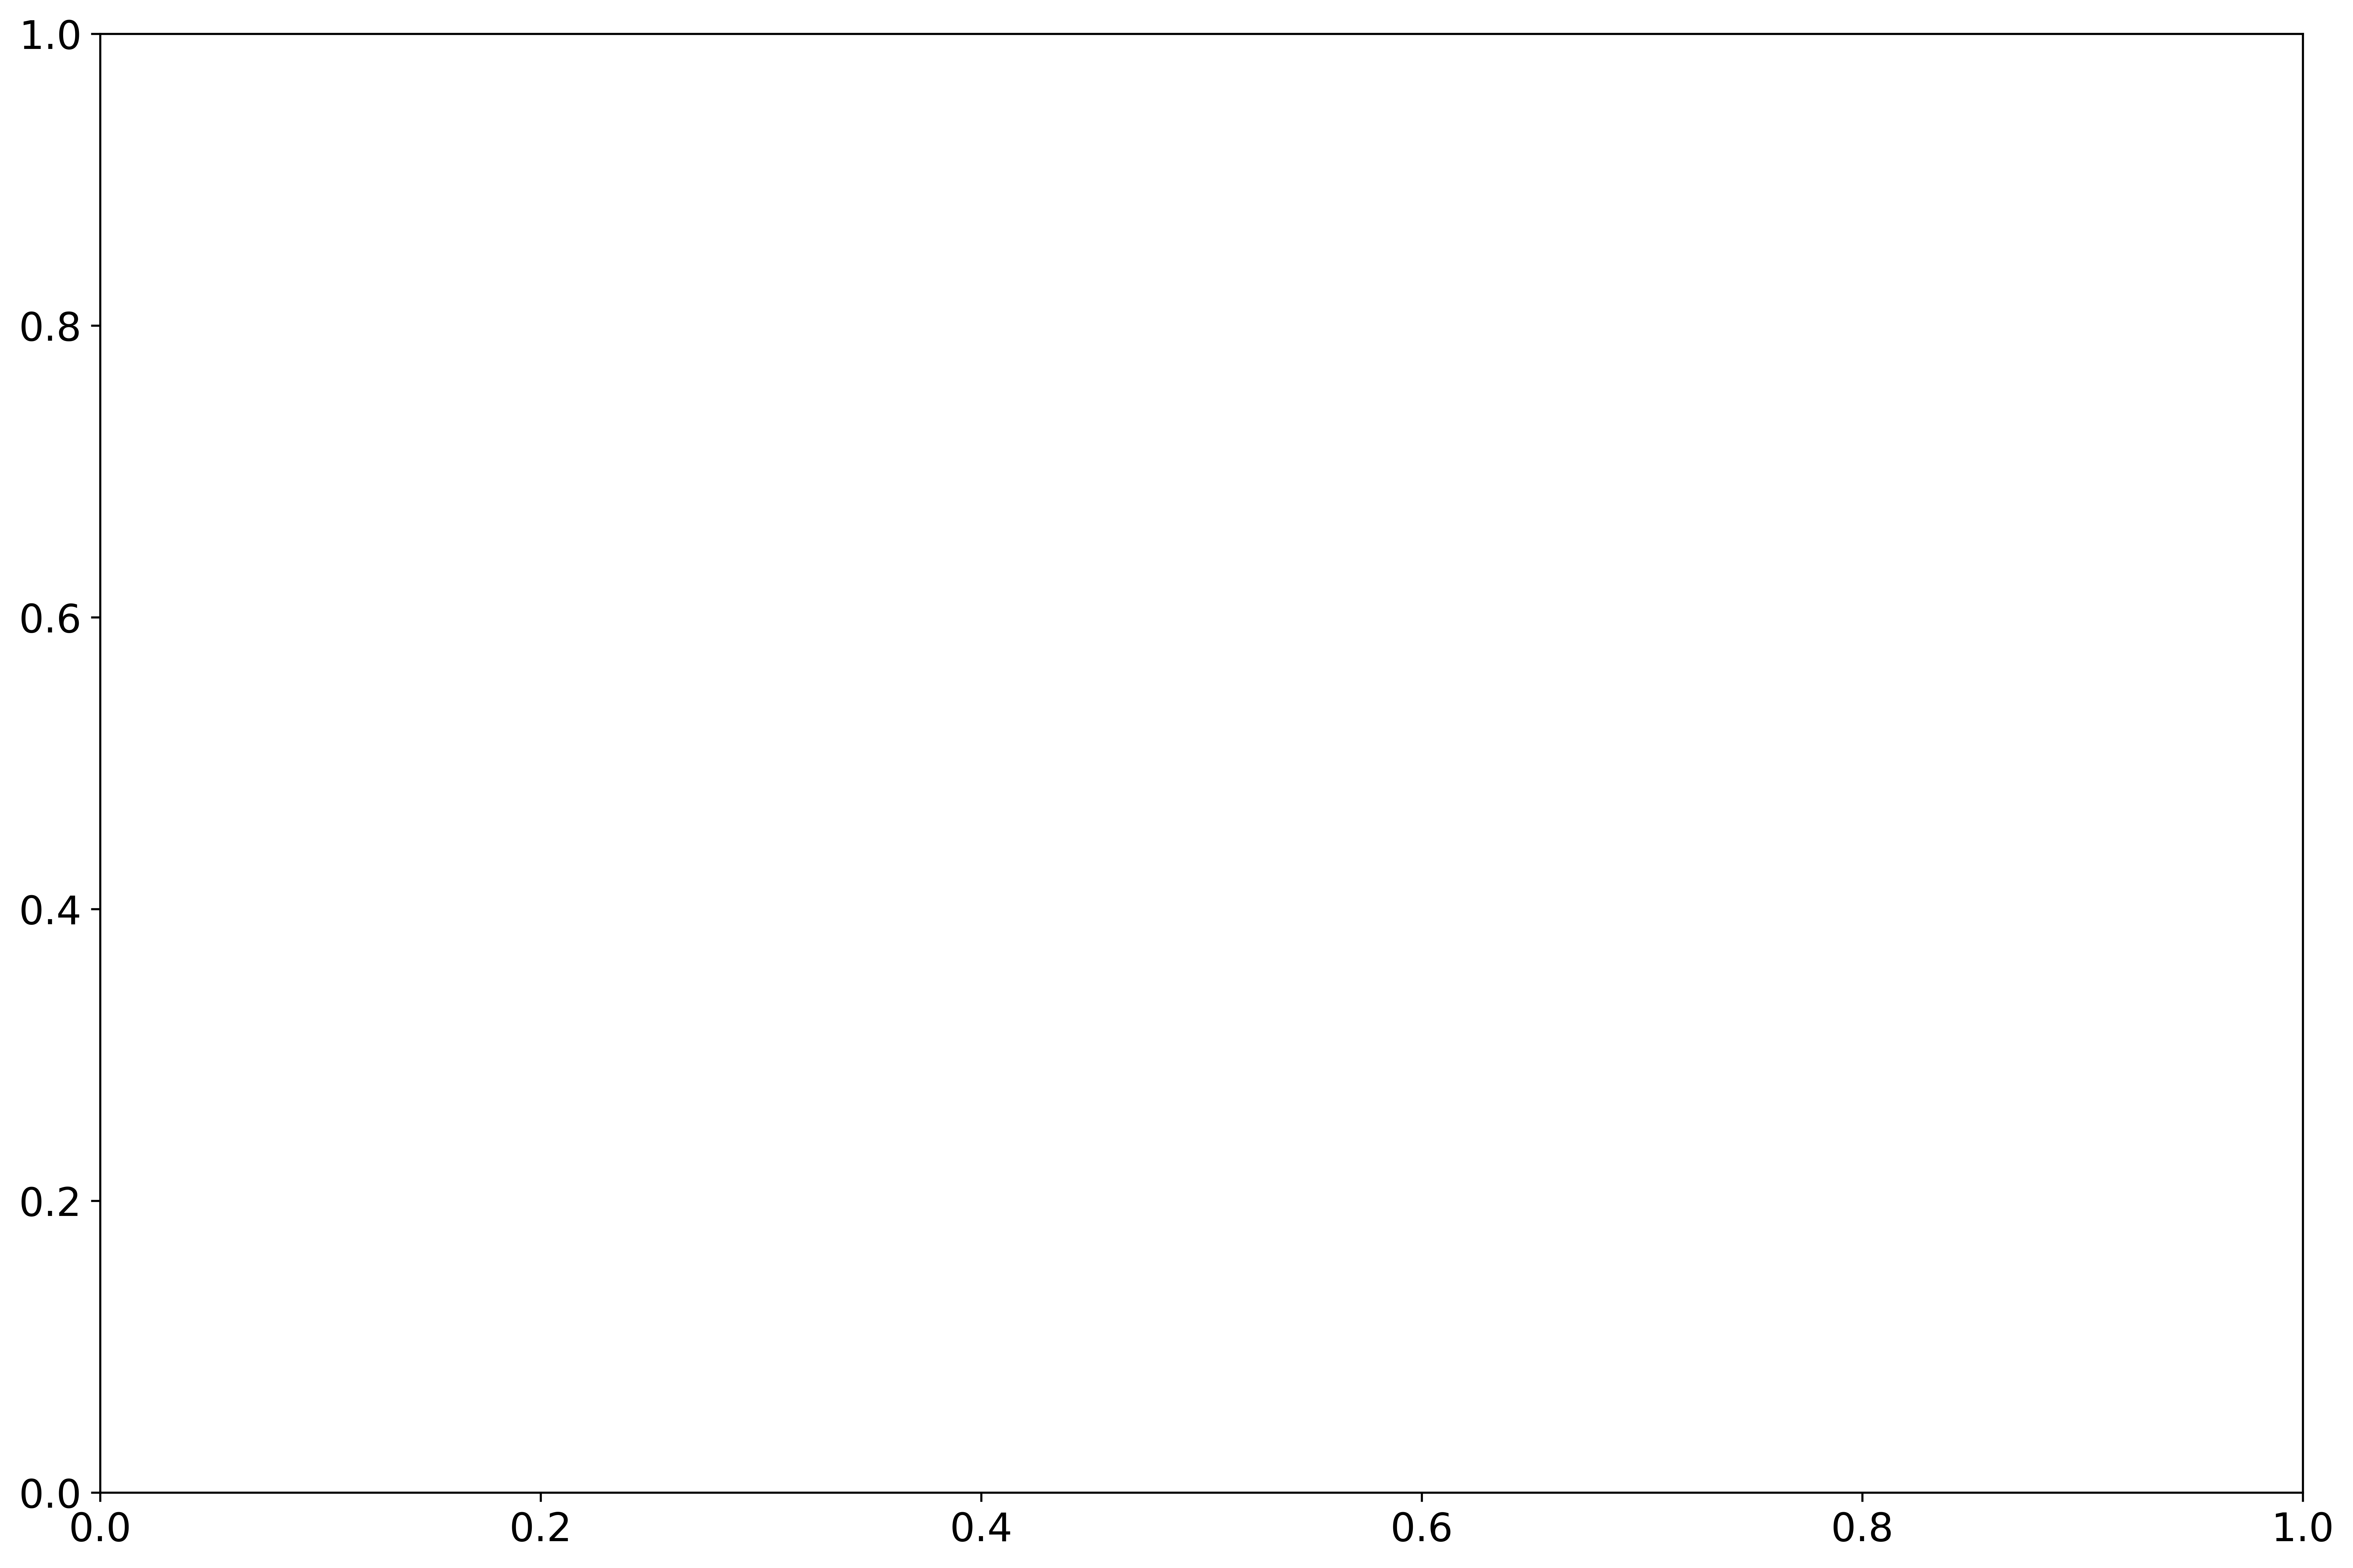

In [14]:
plt.rcParams.update({'font.size':15})

fig, ax = plt.subplots(figsize=(15,10), dpi =600)



In [15]:
#Triu fuct example(how does this works)
np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 0,  8,  9],
       [ 0,  0, 12]])

In [16]:
#mask let you do the diogonal

mask = np.triu(np.ones_like(TanimotoIndex, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True],
       [False, False, False,

In [17]:
len(list(TanimotoIndex.columns))

13

Text(0.5, 1.0, 'Title')

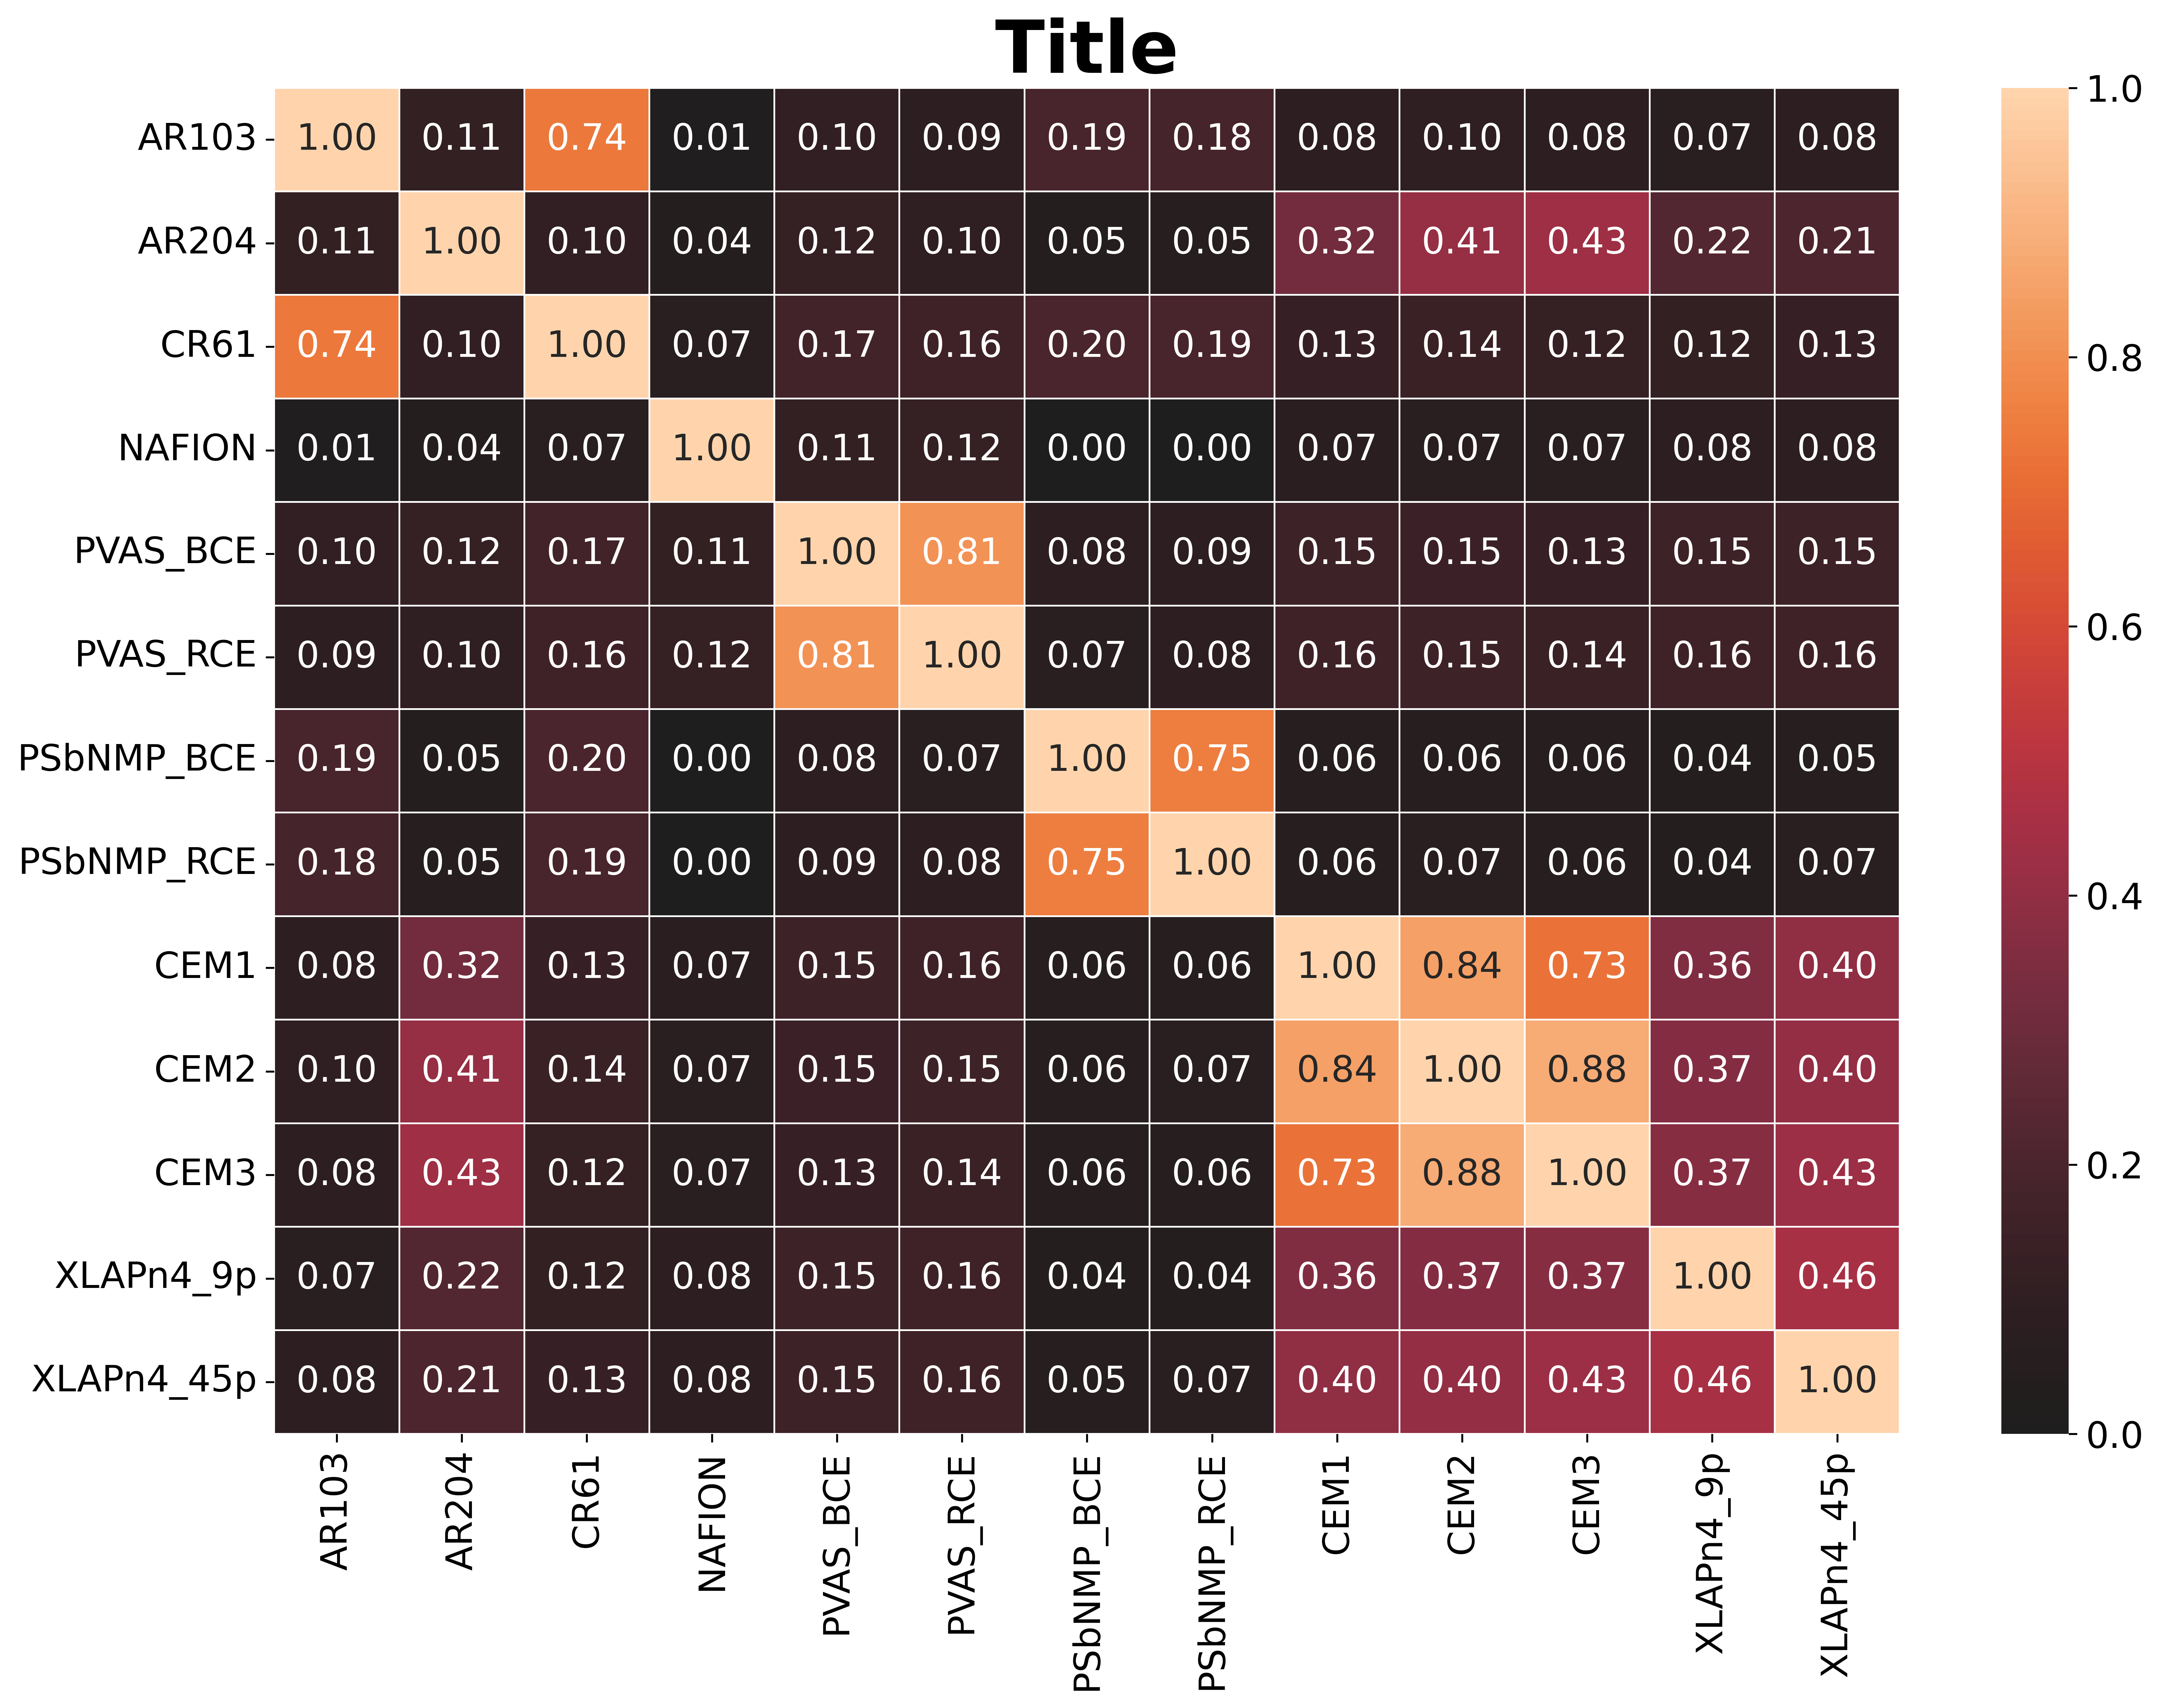

In [18]:
#plot without mask (the digonal)

plt.rcParams.update({'font.size':15})

fig, ax = plt.subplots(figsize=(15,10), dpi =600)

axs = sns.heatmap(TanimotoIndex,  annot = True, fmt = ".2f",center = 0, linewidths = .5)
cbar = ax.collections[0].colorbar; cbar.ax.tick_params(labelsize=15)
ax.set_title('Title', fontweight="bold", fontsize=30)
#labels = [f'p{i}' for i in string.ascii_uppercase[:len(list(TanimotoIndex.columns))]] # based on Figure 4 in the manuscript
#ax.set_xticklabels(labels, rotation = 90, fontsize=15)
#ax.set_yticklabels(labels, rotation = 360, fontsize=15)

Text(0.5, 1.0, 'Title')

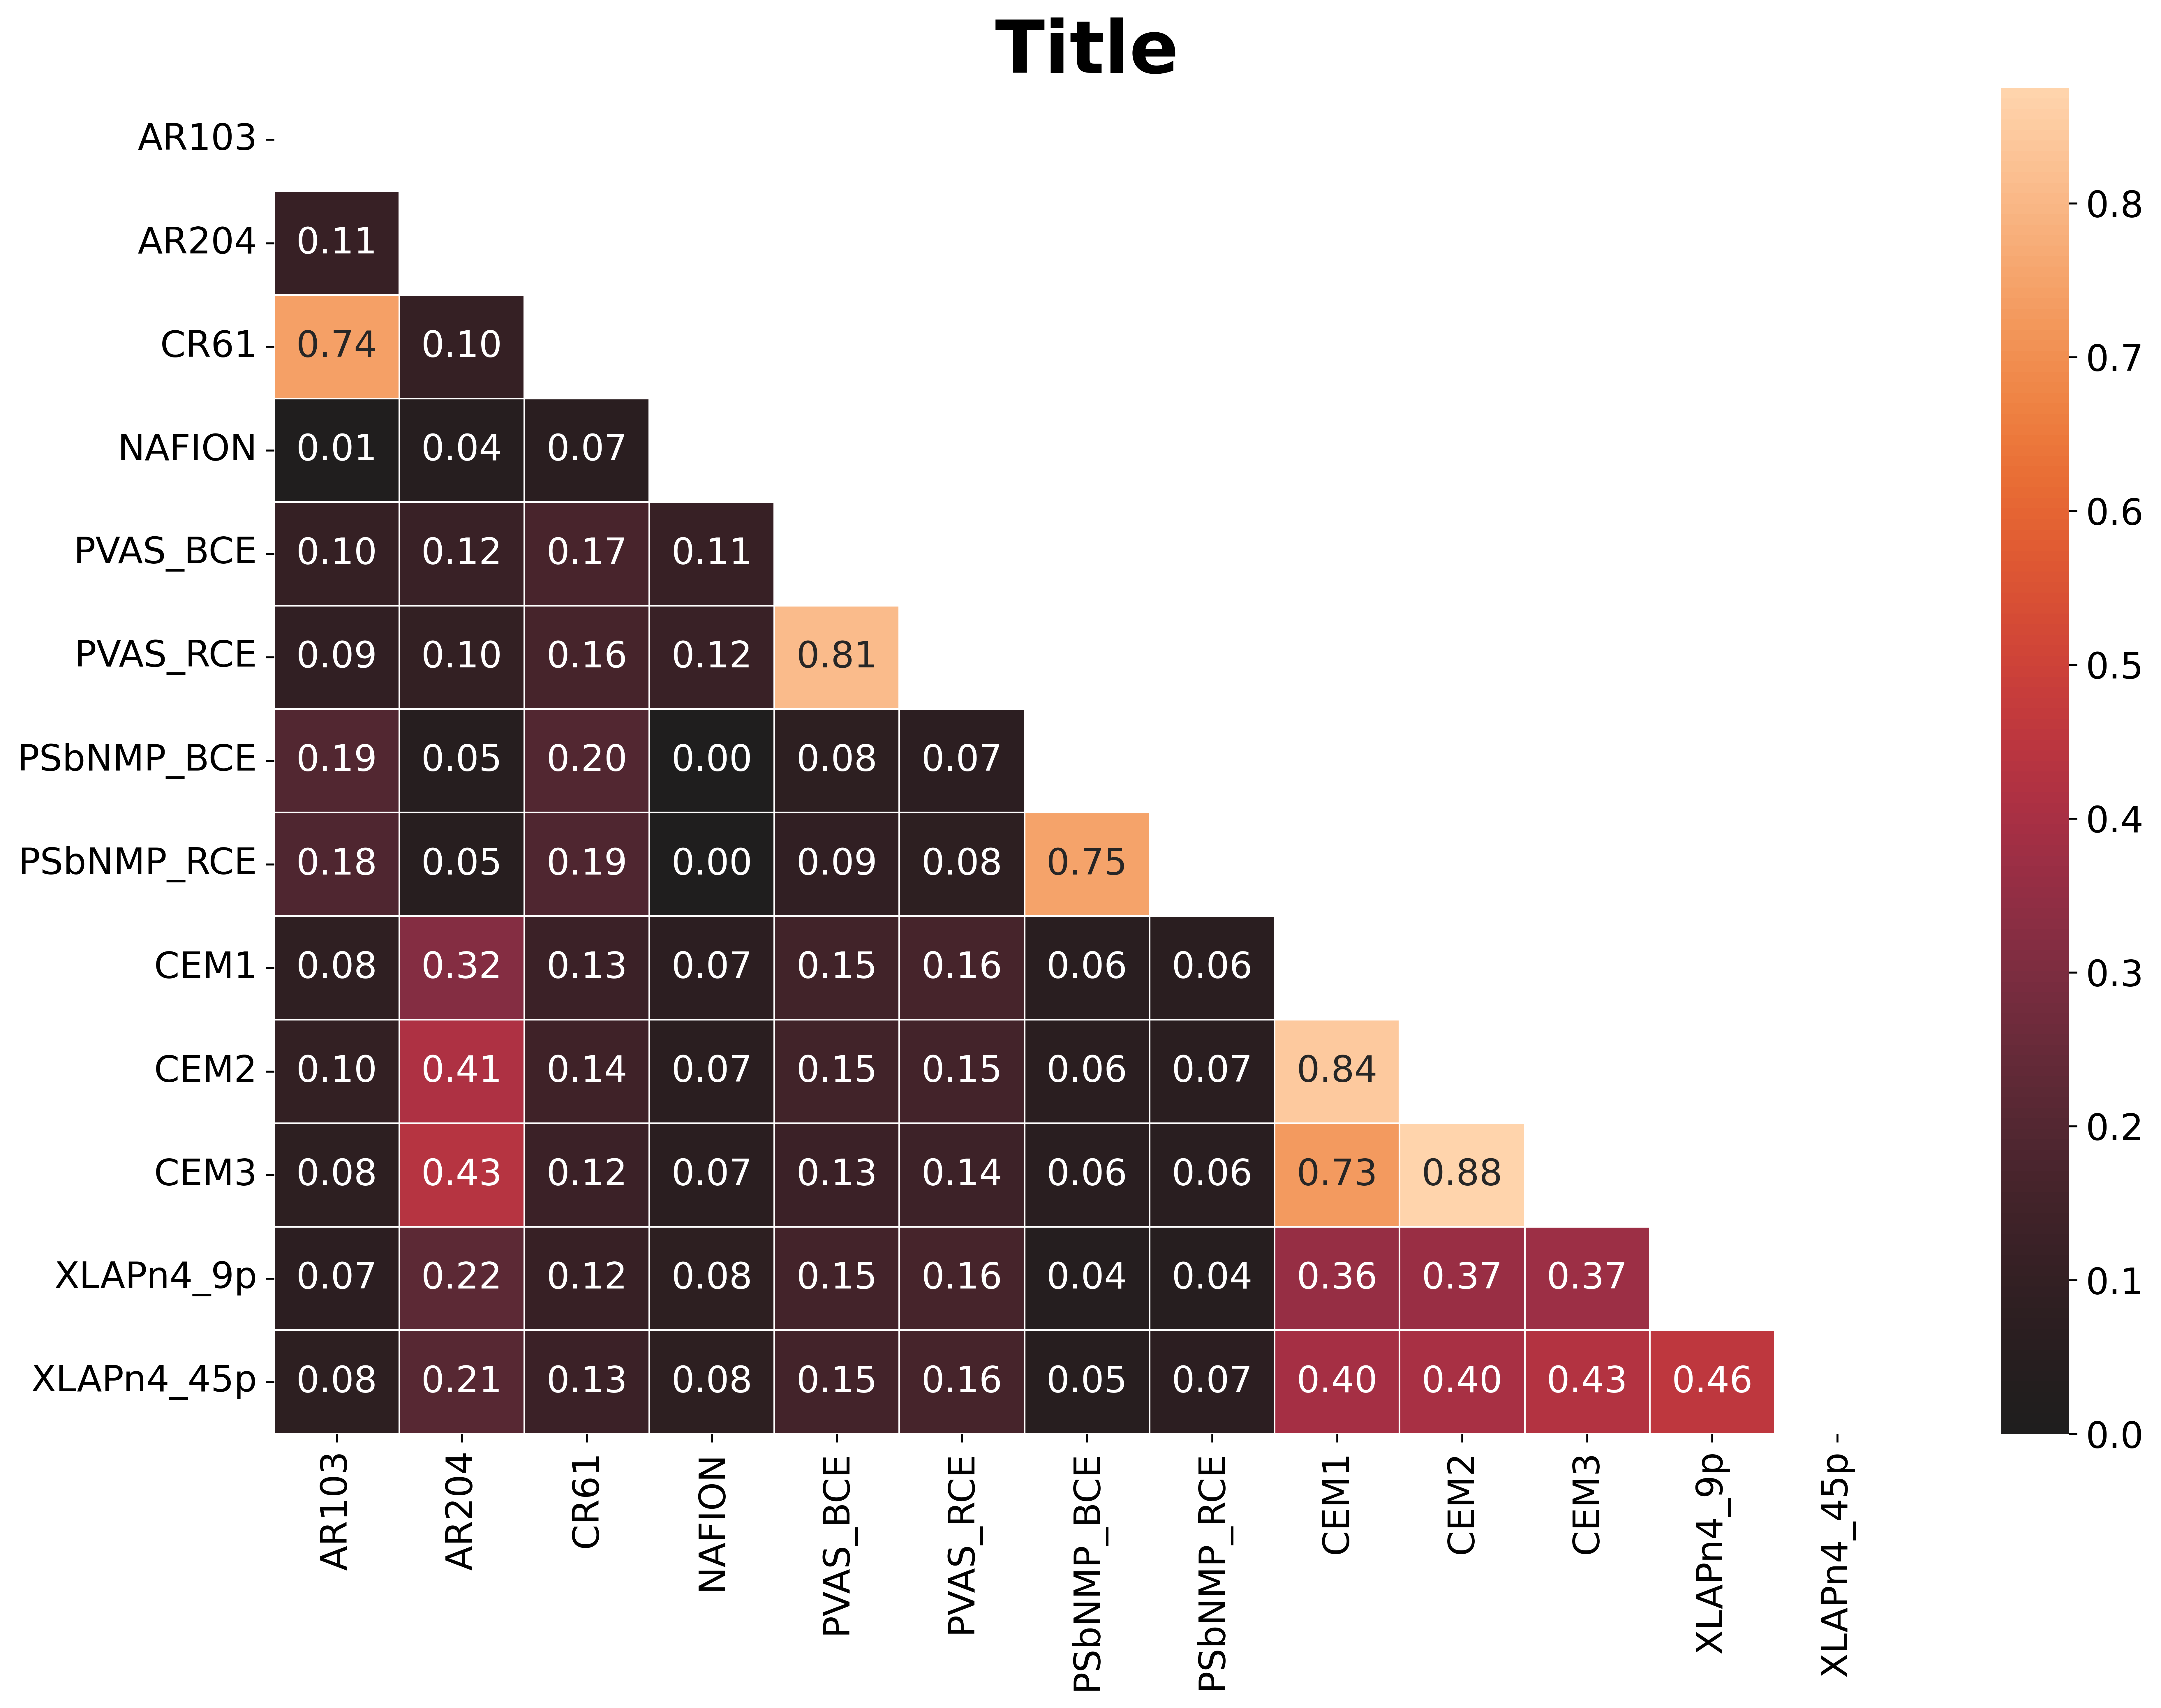

In [19]:
plt.rcParams.update({'font.size':15})

fig, ax = plt.subplots(figsize=(15,10), dpi =600)

axs = sns.heatmap(TanimotoIndex, mask = mask,  annot = True, fmt = ".2f",center = 0, linewidths = .5)
cbar = ax.collections[0].colorbar; cbar.ax.tick_params(labelsize=15)
ax.set_title('Title', fontweight="bold", fontsize=30)
#labels = [f'p{i}' for i in string.ascii_uppercase[:len(list(TanimotoIndex.columns))]] # based on Figure 4 in the manuscript
#ax.set_xticklabels(labels, rotation = 90, fontsize=15)
#ax.set_yticklabels(labels, rotation = 360, fontsize=15)

### SOLVATION PLOT

In [20]:
#getting the data
data2.head()


# Name of the polymer CounterIon Co-Ion  salt  Water-per-ion  \
0   2          PSbNMP_RCE         I-     K+    KI              6   
1   3          PSbNMP_RCE         I-     K+    KI              6   
2   4          PSbNMP_RCE         I-     K+    KI              6   
3   5          PSbNMP_RCE         I-     K+    KI              6   
4  12            PVAS_RCE        Na+    Cl-  NaCl            113   

   concentration_of_salt_M  gr_minima_Ion_H2O  gr_peak_position_Ion_H2O  \
0                     0.02               4.45                      3.65   
1                     0.20               4.45                      3.65   
2                     0.50               4.45                      3.65   
3                     1.00               4.55                      3.65   
4                     0.02               3.15                      2.35   

   gr_peak_height_Ion_H2O  Nr_Ion_H2O  gr_minima_CG_H2O  \
0                    6.50        4.70              5.50   
1                    6.30        4.60              5.50   
2                    6.20        4.60              5.50   
3                    6.00        4.70              5.00   
4                    8.55        5.38              3.37   

   gr_peak_position_CG_H2O  gr_peak_height_CG_H2O  Nr_CG_H2O_  \
0                     3.55                   2.30        6.10   
1                     3.55                   1.90        5.00   
2                     3.55                   1.80        4.50   
3                     3.55                   1.50        3.00   
4                     2.76                   1.83        2.98   

   gr_minima_CG_Ion  gr_peak_position_CG_Ion  gr_peak_height_CG_Ion  \
0              6.15                     4.15                   5.80   
1              6.15                     4.15                   5.80   
2              6.15                     4.15                   5.60   
3              6.15                     4.15                   5.10   
4              3.06                     2.35                   6.71   

   Nr_CG_Ion  Exp_act_coeff  
0       1.90       0.300000  
1       2.00       0.319000  
2       2.20       0.476000  
3       2.50       0.663000  
4       0.13       0.280899

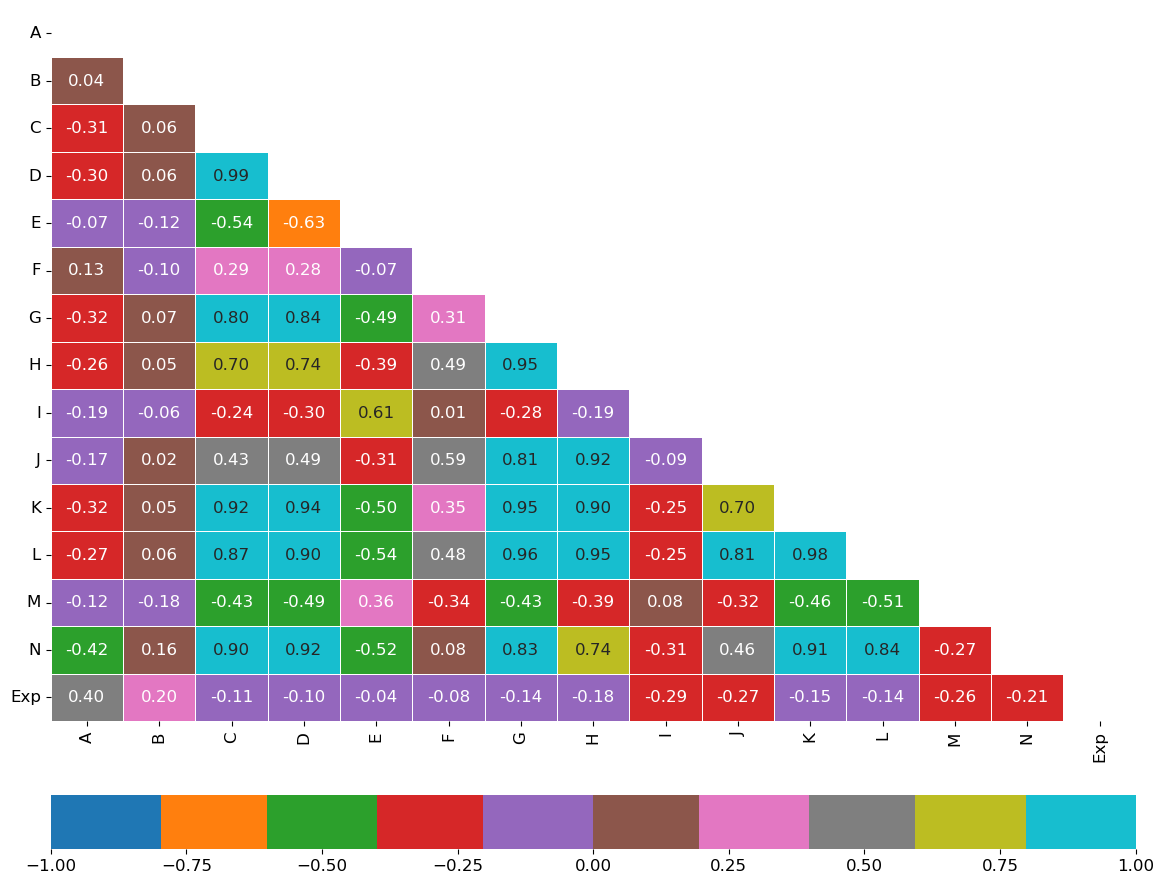

In [21]:
#using her code to get her results
preprocess.get_importance_feature_map(data2, approach='pearson')

In [22]:
#Creating the new data with the respecting columns (the int and float columns only)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         81 non-null     int64  
 1   Name of the polymer       81 non-null     object 
 2   CounterIon                81 non-null     object 
 3   Co-Ion                    81 non-null     object 
 4   salt                      81 non-null     object 
 5   Water-per-ion             81 non-null     int64  
 6   concentration_of_salt_M   81 non-null     float64
 7   gr_minima_Ion_H2O         81 non-null     float64
 8   gr_peak_position_Ion_H2O  81 non-null     float64
 9   gr_peak_height_Ion_H2O    81 non-null     float64
 10  Nr_Ion_H2O                81 non-null     float64
 11  gr_minima_CG_H2O          81 non-null     float64
 12  gr_peak_position_CG_H2O   81 non-null     float64
 13  gr_peak_height_CG_H2O     81 non-null     float64
 14  Nr_CG_H2O_  

In [23]:
columns = ['Water-per-ion','concentration_of_salt_M', 'gr_minima_Ion_H2O', 'gr_peak_position_Ion_H2O', 
           'gr_peak_height_Ion_H2O', 'Nr_Ion_H2O', 'gr_minima_CG_H2O', 'gr_peak_position_CG_H2O', 
           'gr_peak_height_CG_H2O', 'Nr_CG_H2O_','gr_minima_CG_Ion', 'gr_peak_position_CG_Ion',
           'gr_peak_height_CG_Ion', 'Nr_CG_Ion','Exp_act_coeff']

In [24]:
data2 = data2[columns]
data2.head()

Water-per-ion  concentration_of_salt_M  gr_minima_Ion_H2O  \
0              6                     0.02               4.45   
1              6                     0.20               4.45   
2              6                     0.50               4.45   
3              6                     1.00               4.55   
4            113                     0.02               3.15   

   gr_peak_position_Ion_H2O  gr_peak_height_Ion_H2O  Nr_Ion_H2O  \
0                      3.65                    6.50        4.70   
1                      3.65                    6.30        4.60   
2                      3.65                    6.20        4.60   
3                      3.65                    6.00        4.70   
4                      2.35                    8.55        5.38   

   gr_minima_CG_H2O  gr_peak_position_CG_H2O  gr_peak_height_CG_H2O  \
0              5.50                     3.55                   2.30   
1              5.50                     3.55                   1.90   
2              5.50                     3.55                   1.80   
3              5.00                     3.55                   1.50   
4              3.37                     2.76                   1.83   

   Nr_CG_H2O_  gr_minima_CG_Ion  gr_peak_position_CG_Ion  \
0        6.10              6.15                     4.15   
1        5.00              6.15                     4.15   
2        4.50              6.15                     4.15   
3        3.00              6.15                     4.15   
4        2.98              3.06                     2.35   

   gr_peak_height_CG_Ion  Nr_CG_Ion  Exp_act_coeff  
0                   5.80       1.90       0.300000  
1                   5.80       2.00       0.319000  
2                   5.60       2.20       0.476000  
3                   5.10       2.50       0.663000  
4                   6.71       0.13       0.280899

In [25]:
#correlation
data2_corr = data2.corr()
data2_corr

Water-per-ion  concentration_of_salt_M  \
Water-per-ion                  1.000000                 0.041231   
concentration_of_salt_M        0.041231                 1.000000   
gr_minima_Ion_H2O             -0.314194                 0.056500   
gr_peak_position_Ion_H2O      -0.295096                 0.060153   
gr_peak_height_Ion_H2O        -0.068126                -0.121695   
Nr_Ion_H2O                     0.126671                -0.102771   
gr_minima_CG_H2O              -0.322890                 0.067829   
gr_peak_position_CG_H2O       -0.257552                 0.049585   
gr_peak_height_CG_H2O         -0.186992                -0.059956   
Nr_CG_H2O_                    -0.171009                 0.016259   
gr_minima_CG_Ion              -0.322280                 0.052751   
gr_peak_position_CG_Ion       -0.265766                 0.055903   
gr_peak_height_CG_Ion         -0.122449                -0.177627   
Nr_CG_Ion                     -0.418600                 0.157809   
Exp_act_coeff                  0.398868                 0.203521   

                          gr_minima_Ion_H2O  gr_peak_position_Ion_H2O  \
Water-per-ion                     -0.314194                 -0.295096   
concentration_of_salt_M            0.056500                  0.060153   
gr_minima_Ion_H2O                  1.000000                  0.985755   
gr_peak_position_Ion_H2O           0.985755                  1.000000   
gr_peak_height_Ion_H2O            -0.539976                 -0.627400   
Nr_Ion_H2O                         0.291543                  0.279388   
gr_minima_CG_H2O                   0.799449                  0.838381   
gr_peak_position_CG_H2O            0.703183                  0.741344   
gr_peak_height_CG_H2O             -0.237581                 -0.296409   
Nr_CG_H2O_                         0.430091                  0.486805   
gr_minima_CG_Ion                   0.923833                  0.944771   
gr_peak_position_CG_Ion            0.865595                  0.900357   
gr_peak_height_CG_Ion             -0.429348                 -0.490857   
Nr_CG_Ion                          0.904710                  0.915394   
Exp_act_coeff                     -0.105883                 -0.098687   

                          gr_peak_height_Ion_H2O  Nr_Ion_H2O  \
Water-per-ion                          -0.068126    0.126671   
concentration_of_salt_M                -0.121695   -0.102771   
gr_minima_Ion_H2O                      -0.539976    0.291543   
gr_peak_position_Ion_H2O               -0.627400    0.279388   
gr_peak_height_Ion_H2O                  1.000000   -0.068987   
Nr_Ion_H2O                             -0.068987    1.000000   
gr_minima_CG_H2O                       -0.491111    0.308996   
gr_peak_position_CG_H2O                -0.393461    0.494191   
gr_peak_height_CG_H2O                   0.609241    0.011737   
Nr_CG_H2O_                             -0.308738    0.586925   
gr_minima_CG_Ion                       -0.500102    0.351518   
gr_peak_position_CG_Ion                -0.542010    0.476314   
gr_peak_height_CG_Ion                   0.357049   -0.335222   
Nr_CG_Ion                              -0.520818    0.084295   
Exp_act_coeff                          -0.036259   -0.081416   

                          gr_minima_CG_H2O  gr_peak_position_CG_H2O  \
Water-per-ion                    -0.322890                -0.257552   
concentration_of_salt_M           0.067829                 0.049585   
gr_minima_Ion_H2O                 0.799449                 0.703183   
gr_peak_position_Ion_H2O          0.838381                 0.741344   
gr_peak_height_Ion_H2O           -0.491111                -0.393461   
Nr_Ion_H2O                        0.308996                 0.494191   
gr_minima_CG_H2O                  1.000000                 0.948713   
gr_peak_position_CG_H2O           0.948713                 1.000000   
gr_peak_height_CG_H2O            -0.279670                -0.194631   
Nr_CG_H2O_                       

In [26]:
mask = np.triu(np.ones_like(data2_corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, Fa

<AxesSubplot:>

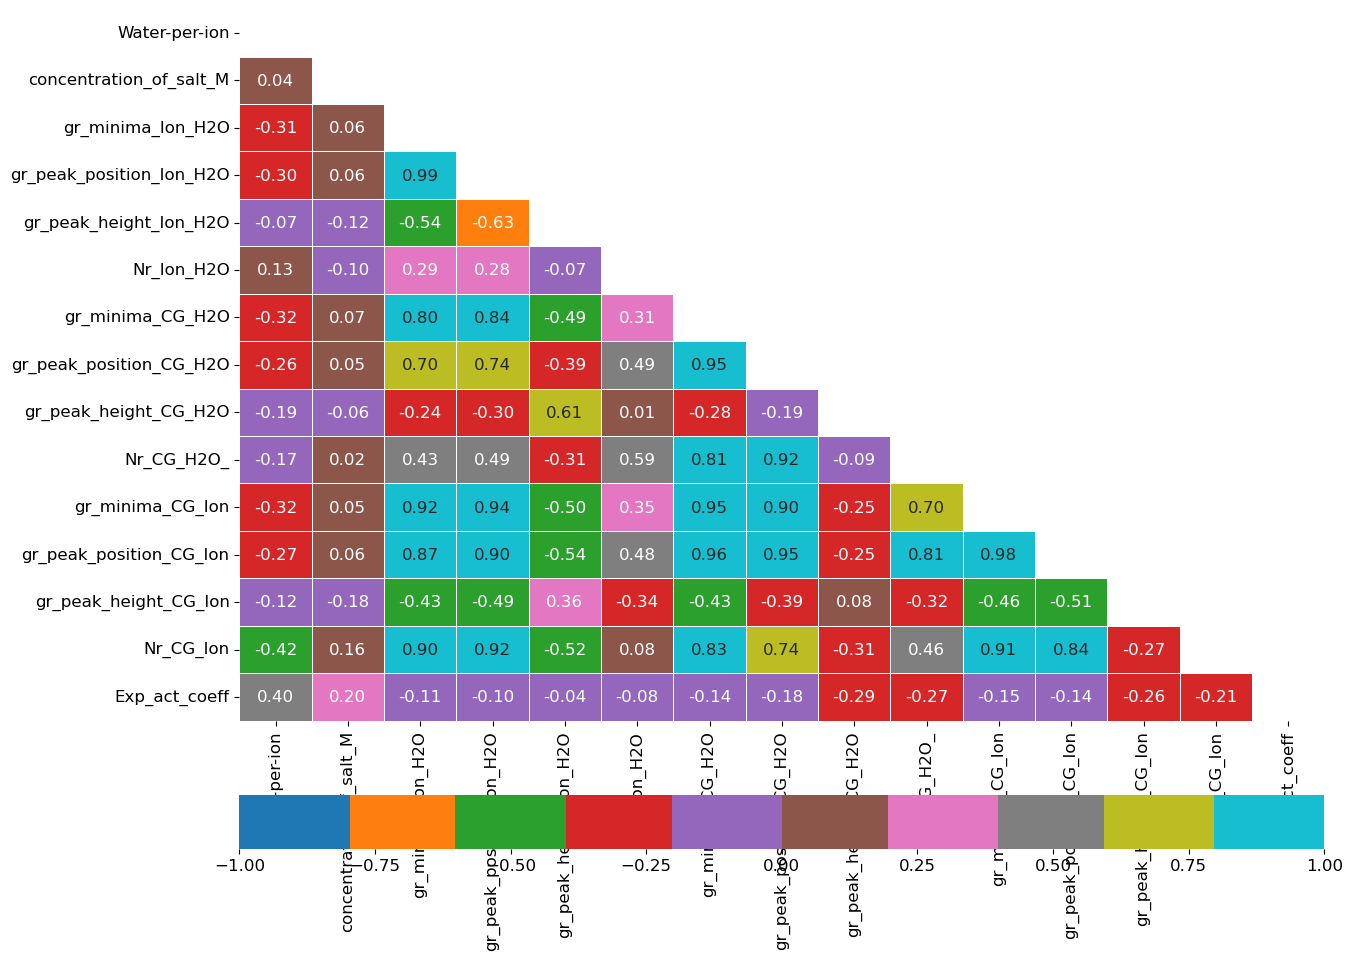

In [27]:
#plot

fig, axs = plt.subplots(figsize=(14,12))

sns.heatmap(data2_corr, mask=mask, annot=True, fmt='.2f', center=0, linewidths=.5,
            ax=axs, cmap='tab10', cbar_kws={"shrink": 1, "pad": 0.08, "orientation": 'horizontal'}, 
            vmin = -1, vmax = +1)

# featurization of data

In [ ]:
## featurization of data
#data = preprocess.data_load(filename = "1.0-hkg-MD-ActCoeff-processed.csv")
## assign X, y
#(X, y, MFprints) = preprocess.featurizer(data, polymers_dict,  'solvation') # descr = 'solvation' or 'activity'
## split and normalize data
#(data_solvation_scaler, X_train, X_test, y_train, y_test) = preprocess.normalizedata(X, y, splitRatio=0.2, state = 48, transform = True, property = 'Y')
#print(f"X_train, X_test, y_train, & y_test has shapes of {X_train.shape}, {X_test.shape}, {y_train.shape}, & {y_test.shape} respectively.")


### convert the categorical variable to numerical values via OneHotEncoder

In [28]:
#Checking the data use for this part in this case is data3 ="1.0-hkg-MD-ActCoeff-processed.csv"

data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         92 non-null     int64  
 1   Name of the polymer       92 non-null     object 
 2   CounterIon                92 non-null     object 
 3   Co-Ion                    92 non-null     object 
 4   salt                      92 non-null     object 
 5   Water-per-ion             92 non-null     int64  
 6   concentration_of_salt_M   92 non-null     float64
 7   gr_minima_Ion_H2O         92 non-null     float64
 8   gr_peak_position_Ion_H2O  92 non-null     float64
 9   gr_peak_height_Ion_H2O    92 non-null     float64
 10  Nr_Ion_H2O                92 non-null     float64
 11  gr_minima_CG_H2O          92 non-null     float64
 12  gr_peak_position_CG_H2O   92 non-null     float64
 13  gr_peak_height_CG_H2O     92 non-null     float64
 14  Nr_CG_H2O_  

In [29]:
#From data3 read columns 'CounterIon','Co-Ion' and converted to numpy
ions = data3[['CounterIon','Co-Ion']].to_numpy()
ions

array([['I-', 'K+'],
       ['I-', 'K+'],
       ['I-', 'K+'],
       ['I-', 'K+'],
       ['I-', 'K+'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['I-', 'K+'],
       ['I-', 'K+'],
       ['I-', 'K+'],
       ['I-', 'K+'],
       ['I-', 'K+'],
       ['Cl-', 'Na+'],
       ['Cl-', 'Na+'],
       ['Cl-', 'Na+'],
       ['Cl-', 'Na+'],
       ['Cl-', 'Na+'],
       ['Cl-', 'Na+'],
       ['Cl-', 'Na+'],
       ['Cl-', 'Na+'],
       ['Cl-', 'Na+'],
       ['Cl-', 'Na+'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       ['Na+', 'Cl-'],
       [

In [30]:
#This line creates an instance of the OneHotEncoder class from scikit-learn.
#The OneHotEncoder is used to perform one-hot encoding on categorical variables, converting them into a binary array representation.

enc = OneHotEncoder(handle_unknown='ignore')


In [31]:
#The fit method of the OneHotEncoder is called with the ions data. This step "fits" the encoder to the data, learning the categories present in the ions array.
enc.fit(ions)

OneHotEncoder(handle_unknown='ignore')

In [32]:
enc.categories_

[array(['Ca2+', 'Cl-', 'I-', 'K+', 'Li+', 'Mg2+', 'Na+'], dtype=object),
 array(['Cl-', 'K+', 'Na+', 'SO42-'], dtype=object)]

In [33]:
#The transform method of the OneHotEncoder is used to transform the ions data into one-hot encoded format. This creates a sparse matrix representation of the one-hot encoded data, and then .toarray() converts it into a dense NumPy array ohe_ions.
ohe_ions = enc.transform(ions).toarray()

In [34]:
ohe_ions

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
range(len(ohe_ions[0]))

range(0, 11)

In [35]:
#The one-hot encoded array ohe_ions is converted back to a DataFrame called ohe_df
#Each column of the DataFrame corresponds to a binary feature representing a specific category from the original 'CounterIon' and 'Co-Ion' columns. The columns are labeled as 'ohe_0', 'ohe_1', 'ohe_2', and so on, where the number of columns is determined by the number of unique categories present in the original columns.
ohe_df = pd.DataFrame(data = ohe_ions, columns=[f'ohe_{i}' for i in range(len(ohe_ions[0]))])
ohe_df

ohe_0  ohe_1  ohe_2  ohe_3  ohe_4  ohe_5  ohe_6  ohe_7  ohe_8  ohe_9  \
0     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
1     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
2     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
3     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
4     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
87    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
88    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
89    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
90    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
91    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   

    ohe_10  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
..     ...  
87     0.0  
88     0.0  
89     0.0  
90     0.0  
91     0.0  

[92 rows x 11 columns]

In [56]:
#I add this part to understand better the table in which was converted

a = enc.categories_[0]  
b = enc.categories_[1]
print(a)
print(b)

['Ca2+' 'Cl-' 'I-' 'K+' 'Li+' 'Mg2+' 'Na+']
['Cl-' 'K+' 'Na+' 'SO42-']


In [37]:
#Add both columns together
column= np.concatenate((a,b))
column

array(['Ca2+', 'Cl-', 'I-', 'K+', 'Li+', 'Mg2+', 'Na+', 'Cl-', 'K+',
       'Na+', 'SO42-'], dtype=object)

In [38]:
#so basically each line will appeard a 1 if it was mension Eg. first line we have as counter Ion = I- and co-ion = K+ so this two will appear as 1 and the rest 0
ohe_df1 = pd.DataFrame(data = ohe_ions, columns=column)
ohe_df1

Ca2+  Cl-   I-   K+  Li+  Mg2+  Na+  Cl-   K+  Na+  SO42-
0    0.0  0.0  1.0  0.0  0.0   0.0  0.0  0.0  1.0  0.0    0.0
1    0.0  0.0  1.0  0.0  0.0   0.0  0.0  0.0  1.0  0.0    0.0
2    0.0  0.0  1.0  0.0  0.0   0.0  0.0  0.0  1.0  0.0    0.0
3    0.0  0.0  1.0  0.0  0.0   0.0  0.0  0.0  1.0  0.0    0.0
4    0.0  0.0  1.0  0.0  0.0   0.0  0.0  0.0  1.0  0.0    0.0
..   ...  ...  ...  ...  ...   ...  ...  ...  ...  ...    ...
87   0.0  0.0  0.0  0.0  0.0   0.0  1.0  1.0  0.0  0.0    0.0
88   0.0  0.0  0.0  0.0  0.0   0.0  1.0  1.0  0.0  0.0    0.0
89   0.0  0.0  0.0  0.0  0.0   0.0  1.0  1.0  0.0  0.0    0.0
90   0.0  0.0  0.0  0.0  0.0   0.0  1.0  1.0  0.0  0.0    0.0
91   0.0  0.0  0.0  0.0  0.0   0.0  1.0  1.0  0.0  0.0    0.0

[92 rows x 11 columns]

### Generate FingerPrint

In [58]:
#The keys() method of a dictionary returns a view object that contains all the keys of the dictionary. In this case, it will contain the polymer names from the polymers_dict.
polymers_dict.keys()

dict_keys(['AR103', 'AR204', 'CR61', 'NAFION', 'PVAS_BCE', 'PVAS_RCE', 'PSbNMP_BCE', 'PSbNMP_RCE', 'CEM1', 'CEM2', 'CEM3', 'XLAPn4_9p', 'XLAPn4_45p'])

In [40]:
polymers_names = list(polymers_dict.keys())
polymers_names

['AR103',
 'AR204',
 'CR61',
 'NAFION',
 'PVAS_BCE',
 'PVAS_RCE',
 'PSbNMP_BCE',
 'PSbNMP_RCE',
 'CEM1',
 'CEM2',
 'CEM3',
 'XLAPn4_9p',
 'XLAPn4_45p']

In [64]:
polymers_dict['AR103']

In [42]:
fps_dict = {}
descr ='solvation'
for polymer in polymers_names:
    if descr == 'solvation':
            fps_dict[polymer] = AllChem.GetMorganFingerprintAsBitVect(polymers_dict[polymer], useChirality=True, radius=3, nBits=124)
    else:
            fps_dict[polymer] = AllChem.GetMorganFingerprintAsBitVect(polymers_dict[polymer], useChirality=True, radius=3, nBits=128)

fps_dict

{'AR103': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x15780ccca50>,
 'AR204': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x15780cccac0>,
 'CR61': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x15780cccb30>,
 'NAFION': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x15780cccc10>,
 'PVAS_BCE': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x15780cccc80>,
 'PVAS_RCE': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x15780ccccf0>,
 'PSbNMP_BCE': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x15780cccd60>,
 'PSbNMP_RCE': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x15780cccdd0>,
 'CEM1': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x15780ccce40>,
 'CEM2': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x15780ccceb0>,
 'CEM3': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x15780cccf20>,
 'XLAPn4_9p': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x15780cccf90>,
 'XLAPn4_45p': <rdkit.DataStructs.cDataStructs.ExplicitBitV

In [70]:
print(np.array(fps_dict['AR103']))

[1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0
 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1
 1 1 0 0 0 1 0 1 1 0 1 1 1]


In [68]:
# print On bits
print("Index of On bits:",tuple(fps_dict['AR103'].GetOnBits()))
# how many bits are On?
print("Number of On bits: ",len(fps_dict['AR103'].GetOnBits()))

Index of On bits: (0, 1, 2, 5, 6, 9, 10, 11, 14, 17, 19, 21, 22, 26, 28, 31, 35, 36, 38, 41, 43, 44, 45, 46, 47, 48, 49, 53, 56, 58, 59, 61, 65, 66, 72, 74, 75, 76, 80, 81, 82, 83, 84, 85, 87, 91, 92, 97, 98, 100, 101, 106, 109, 110, 111, 112, 116, 118, 119, 121, 122, 123)
Number of On bits:  62


In [67]:
print("Index of On bits:", np.nonzero(fps_dict['AR103']))
print("Number of On bits: ", np.count_nonzero(fps_dict['AR103']))

Index of On bits: (array([  0,   1,   2,   5,   6,   9,  10,  11,  14,  17,  19,  21,  22,
        26,  28,  31,  35,  36,  38,  41,  43,  44,  45,  46,  47,  48,
        49,  53,  56,  58,  59,  61,  65,  66,  72,  74,  75,  76,  80,
        81,  82,  83,  84,  85,  87,  91,  92,  97,  98, 100, 101, 106,
       109, 110, 111, 112, 116, 118, 119, 121, 122, 123], dtype=int64),)
Number of On bits:  62


In [71]:
from rdkit.Chem import Draw

In [74]:

Draw.DrawMorganBit(fps_dict['AR103'], 122, fps_dict)

KeyError: 122

In [ ]:
# Render all the fragments or features that are responsible for making ON bits
all_fragments = [(fps_dict['AR103'], x, onbits) for x in fps_dict.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in fps_dict.GetOnBits()][:])

In [43]:
vects_dict = {}
for polymer in polymers_names:
    data_ = np.array(fps_dict[polymer]).reshape(1, -1)
    vects_dict[polymer] = pd.DataFrame(data = data_, columns=[f'mfp_{i}' for i in range(len(data_[0]))])

vects_dict

{'AR103':    mfp_0  mfp_1  mfp_2  mfp_3  mfp_4  mfp_5  mfp_6  mfp_7  mfp_8  mfp_9  ...  \
 0      1      1      1      0      0      1      1      0      0      1  ...   
 
    mfp_114  mfp_115  mfp_116  mfp_117  mfp_118  mfp_119  mfp_120  mfp_121  \
 0        0        0        1        0        1        1        0        1   
 
    mfp_122  mfp_123  
 0        1        1  
 
 [1 rows x 124 columns],
 'AR204':    mfp_0  mfp_1  mfp_2  mfp_3  mfp_4  mfp_5  mfp_6  mfp_7  mfp_8  mfp_9  ...  \
 0      1      1      1      0      1      1      1      1      1      0  ...   
 
    mfp_114  mfp_115  mfp_116  mfp_117  mfp_118  mfp_119  mfp_120  mfp_121  \
 0        0        1        1        1        0        1        1        1   
 
    mfp_122  mfp_123  
 0        1        0  
 
 [1 rows x 124 columns],
 'CR61':    mfp_0  mfp_1  mfp_2  mfp_3  mfp_4  mfp_5  mfp_6  mfp_7  mfp_8  mfp_9  ...  \
 0      1      1      1      0      0      1      1      0      0      1  ...   
 
    mfp_114  mfp_115

In [44]:
fingerprints01 = pd.DataFrame()
fingerprints01

Empty DataFrame
Columns: []
Index: []

In [45]:
for i, polymer in enumerate(data3['Name of the polymer']):
    polymer=polymer.replace('\u200b','')
    try:
        fingerprints01 = pd.concat([vects_dict[polymer], fingerprints01.reset_index(drop=True)], axis=0).reset_index(drop=True)
    except KeyError:
        pass

fingerprints01

mfp_0  mfp_1  mfp_2  mfp_3  mfp_4  mfp_5  mfp_6  mfp_7  mfp_8  mfp_9  ...  \
0       1      1      0      1      1      1      0      0      1      0  ...   
1       1      1      0      1      1      1      0      0      1      0  ...   
2       1      1      0      1      1      1      0      0      1      0  ...   
3       1      1      0      1      1      1      0      0      1      0  ...   
4       1      1      0      1      1      1      0      0      1      0  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
87      0      1      1      1      0      1      0      0      0      1  ...   
88      0      1      1      1      0      1      0      0      0      1  ...   
89      0      1      1      1      0      1      0      0      0      1  ...   
90      0      1      1      1      0      1      0      0      0      1  ...   
91      0      1      1      1      0      1      0      0      0      1  ...   

    mfp_114  mfp_115  mfp_116  mfp_117  mfp_118  mfp_119  mfp_120  mfp_121  \
0         0        0        0        0        1        1        0        1   
1         0        0        0        0        1        1        0        1   
2         0        0        0        0        1        1        0        1   
3         0        0        0        0        1        1        0        1   
4         0        0        0        0        1        1        0        1   
..      ...      ...      ...      ...      ...      ...      ...      ...   
87        0        0        0        0        0        0        0        1   
88        0        0        0        0        0        0        0        1   
89        0        0        0        0        0        0        0        1   
90        0        0        0        0        0        0        0        1   
91        0        0        0        0        0        0        0        1   

    mfp_122  mfp_123  
0         1        1  
1         1        1  
2         1        1  
3         1        1  
4         1        1  
..      ...      ...  
87        1        1  
88        1        1  
89        1        1  
90        1        1  
91        1        1  

[92 rows x 124 columns]

In [46]:
reverse_fingerprints = fingerprints01.iloc[::-1].reset_index(drop=True)
reverse_fingerprints

mfp_0  mfp_1  mfp_2  mfp_3  mfp_4  mfp_5  mfp_6  mfp_7  mfp_8  mfp_9  ...  \
0       0      1      1      1      0      1      0      0      0      1  ...   
1       0      1      1      1      0      1      0      0      0      1  ...   
2       0      1      1      1      0      1      0      0      0      1  ...   
3       0      1      1      1      0      1      0      0      0      1  ...   
4       0      1      1      1      0      1      0      0      0      1  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
87      1      1      0      1      1      1      0      0      1      0  ...   
88      1      1      0      1      1      1      0      0      1      0  ...   
89      1      1      0      1      1      1      0      0      1      0  ...   
90      1      1      0      1      1      1      0      0      1      0  ...   
91      1      1      0      1      1      1      0      0      1      0  ...   

    mfp_114  mfp_115  mfp_116  mfp_117  mfp_118  mfp_119  mfp_120  mfp_121  \
0         0        0        0        0        0        0        0        1   
1         0        0        0        0        0        0        0        1   
2         0        0        0        0        0        0        0        1   
3         0        0        0        0        0        0        0        1   
4         0        0        0        0        0        0        0        1   
..      ...      ...      ...      ...      ...      ...      ...      ...   
87        0        0        0        0        1        1        0        1   
88        0        0        0        0        1        1        0        1   
89        0        0        0        0        1        1        0        1   
90        0        0        0        0        1        1        0        1   
91        0        0        0        0        1        1        0        1   

    mfp_122  mfp_123  
0         1        1  
1         1        1  
2         1        1  
3         1        1  
4         1        1  
..      ...      ...  
87        1        1  
88        1        1  
89        1        1  
90        1        1  
91        1        1  

[92 rows x 124 columns]

In [47]:
# drop unneeded columns
if descr == 'solvation':
    data_m = data3.drop(columns = ['#', 'Name of the polymer', 'CounterIon', 'Co-Ion', 'salt','Exp_act_coeff'])

data_m

Water-per-ion  concentration_of_salt_M  gr_minima_Ion_H2O  \
0               6                     0.00               4.45   
1               6                     0.02               4.45   
2               6                     0.20               4.45   
3               6                     0.50               4.45   
4               6                     1.00               4.55   
..            ...                      ...                ...   
87             24                     0.01               3.18   
88             24                     0.03               3.16   
89             24                     0.10               3.17   
90             24                     0.30               3.15   
91             24                     1.00               3.16   

    gr_peak_position_Ion_H2O  gr_peak_height_Ion_H2O  Nr_Ion_H2O  \
0                       3.65                    6.50        4.70   
1                       3.65                    6.50        4.70   
2                       3.65                    6.30        4.60   
3                       3.65                    6.20        4.60   
4                       3.65                    6.00        4.70   
..                       ...                     ...         ...   
87                      2.35                    9.81        4.62   
88                      2.35                    8.53        4.04   
89                      2.35                    9.70        4.60   
90                      2.35                    9.60        4.52   
91                      2.35                    9.29        4.43   

    gr_minima_CG_H2O  gr_peak_position_CG_H2O  gr_peak_height_CG_H2O  \
0               5.40                     3.55                   2.16   
1               5.50                     3.55                   2.30   
2               5.50                     3.55                   1.90   
3               5.50                     3.55                   1.80   
4               5.00                     3.55                   1.50   
..               ...                      ...                    ...   
87              3.43                     2.75                   1.69   
88              3.60                     2.75                   1.46   
89              3.55                     2.75                   1.68   
90              3.55                     2.75                   1.66   
91              3.75                     2.75                   1.48   

    Nr_CG_H2O_  gr_minima_CG_Ion  gr_peak_position_CG_Ion  \
0         5.30              6.25                     4.15   
1         6.10              6.15                     4.15   
2         5.00              6.15                     4.15   
3         4.50              6.15                     4.15   
4         3.00              6.15                     4.15   
..         ...               ...                      ...   
87        2.02              3.01                     2.35   
88        2.40              3.05                     2.35   
89        2.33              3.05                     2.35   
90        2.27              3.06                     2.35   
91        2.53              3.07                     2.35   

    gr_peak_height_CG_Ion  Nr_CG_Ion  
0                    5.60       1.90  
1                    5.80       1.90  
2                    5.80       2.00  
3                    5.60       2.20  
4                    5.10       2.50  
..                    ...        ...  
87                   7.72       0.14  
88                  14.64       0.31  
89                   8.30       0.18  
90                   8.55       0.19  
91                   9.42       0.30  

[92 rows x 14 columns]

In [48]:
data_mm = pd.concat([ohe_df, data_m], axis=1).reset_index(drop=True)
data_mm

ohe_0  ohe_1  ohe_2  ohe_3  ohe_4  ohe_5  ohe_6  ohe_7  ohe_8  ohe_9  ...  \
0     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  ...   
1     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  ...   
2     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  ...   
3     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  ...   
4     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
87    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0  ...   
88    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0  ...   
89    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0  ...   
90    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0  ...   
91    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0  ...   

    gr_peak_height_Ion_H2O  Nr_Ion_H2O  gr_minima_CG_H2O  \
0                     6.50        4.70              5.40   
1                     6.50        4.70              5.50   
2                     6.30        4.60              5.50   
3                     6.20        4.60              5.50   
4                     6.00        4.70              5.00   
..                     ...         ...               ...   
87                    9.81        4.62              3.43   
88                    8.53        4.04              3.60   
89                    9.70        4.60              3.55   
90                    9.60        4.52              3.55   
91                    9.29        4.43              3.75   

    gr_peak_position_CG_H2O  gr_peak_height_CG_H2O  Nr_CG_H2O_  \
0                      3.55                   2.16        5.30   
1                      3.55                   2.30        6.10   
2                      3.55                   1.90        5.00   
3                      3.55                   1.80        4.50   
4                      3.55                   1.50        3.00   
..                      ...                    ...         ...   
87                     2.75                   1.69        2.02   
88                     2.75                   1.46        2.40   
89                     2.75                   1.68        2.33   
90                     2.75                   1.66        2.27   
91                     2.75                   1.48        2.53   

    gr_minima_CG_Ion  gr_peak_position_CG_Ion  gr_peak_height_CG_Ion  \
0               6.25                     4.15                   5.60   
1               6.15                     4.15                   5.80   
2               6.15                     4.15                   5.80   
3               6.15                     4.15                   5.60   
4               6.15                     4.15                   5.10   
..               ...                      ...                    ...   
87              3.01                     2.35                   7.72   
88              3.05                     2.35                  14.64   
89              3.05                     2.35                   8.30   
90              3.06                     2.35                   8.55   
91              3.07                     2.35                   9.42   

    Nr_CG_Ion  
0        1.90  
1        1.90  
2        2.00  
3        2.20  
4        2.50  
..        ...  
87       0.14  
88       0.31  
89       0.18  
90       0.19  
91       0.30  

[92 rows x 25 columns]

In [49]:
data_mmm = pd.concat([reverse_fingerprints, data_mm], axis=1).dropna()
data_mmm

mfp_0  mfp_1  mfp_2  mfp_3  mfp_4  mfp_5  mfp_6  mfp_7  mfp_8  mfp_9  ...  \
0       0      1      1      1      0      1      0      0      0      1  ...   
1       0      1      1      1      0      1      0      0      0      1  ...   
2       0      1      1      1      0      1      0      0      0      1  ...   
3       0      1      1      1      0      1      0      0      0      1  ...   
4       0      1      1      1      0      1      0      0      0      1  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
87      1      1      0      1      1      1      0      0      1      0  ...   
88      1      1      0      1      1      1      0      0      1      0  ...   
89      1      1      0      1      1      1      0      0      1      0  ...   
90      1      1      0      1      1      1      0      0      1      0  ...   
91      1      1      0      1      1      1      0      0      1      0  ...   

    gr_peak_height_Ion_H2O  Nr_Ion_H2O  gr_minima_CG_H2O  \
0                     6.50        4.70              5.40   
1                     6.50        4.70              5.50   
2                     6.30        4.60              5.50   
3                     6.20        4.60              5.50   
4                     6.00        4.70              5.00   
..                     ...         ...               ...   
87                    9.81        4.62              3.43   
88                    8.53        4.04              3.60   
89                    9.70        4.60              3.55   
90                    9.60        4.52              3.55   
91                    9.29        4.43              3.75   

    gr_peak_position_CG_H2O  gr_peak_height_CG_H2O  Nr_CG_H2O_  \
0                      3.55                   2.16        5.30   
1                      3.55                   2.30        6.10   
2                      3.55                   1.90        5.00   
3                      3.55                   1.80        4.50   
4                      3.55                   1.50        3.00   
..                      ...                    ...         ...   
87                     2.75                   1.69        2.02   
88                     2.75                   1.46        2.40   
89                     2.75                   1.68        2.33   
90                     2.75                   1.66        2.27   
91                     2.75                   1.48        2.53   

    gr_minima_CG_Ion  gr_peak_position_CG_Ion  gr_peak_height_CG_Ion  \
0               6.25                     4.15                   5.60   
1               6.15                     4.15                   5.80   
2               6.15                     4.15                   5.80   
3               6.15                     4.15                   5.60   
4               6.15                     4.15                   5.10   
..               ...                      ...                    ...   
87              3.01                     2.35                   7.72   
88              3.05                     2.35                  14.64   
89              3.05                     2.35                   8.30   
90              3.06                     2.35                   8.55   
91              3.07                     2.35                   9.42   

    Nr_CG_Ion  
0        1.90  
1        1.90  
2        2.00  
3        2.20  
4        2.50  
..        ...  
87       0.14  
88       0.31  
89       0.18  
90       0.19  
91       0.30  

[92 rows x 149 columns]

In [50]:
data_mmm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Columns: 149 entries, mfp_0 to Nr_CG_Ion
dtypes: float64(24), int32(124), int64(1)
memory usage: 62.7 KB


In [51]:
ohe_df.shape[1]


11

In [52]:
reverse_fingerprints.shape[1]

124

In [53]:
x_index01 = ohe_df.shape[1] + reverse_fingerprints.shape[1] + 2
x_index01

137

In [54]:
X01_MF = data_mmm.iloc[:, :x_index01]
X01_MF

mfp_0  mfp_1  mfp_2  mfp_3  mfp_4  mfp_5  mfp_6  mfp_7  mfp_8  mfp_9  ...  \
0       0      1      1      1      0      1      0      0      0      1  ...   
1       0      1      1      1      0      1      0      0      0      1  ...   
2       0      1      1      1      0      1      0      0      0      1  ...   
3       0      1      1      1      0      1      0      0      0      1  ...   
4       0      1      1      1      0      1      0      0      0      1  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
87      1      1      0      1      1      1      0      0      1      0  ...   
88      1      1      0      1      1      1      0      0      1      0  ...   
89      1      1      0      1      1      1      0      0      1      0  ...   
90      1      1      0      1      1      1      0      0      1      0  ...   
91      1      1      0      1      1      1      0      0      1      0  ...   

    ohe_3  ohe_4  ohe_5  ohe_6  ohe_7  ohe_8  ohe_9  ohe_10  Water-per-ion  \
0     0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0              6   
1     0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0              6   
2     0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0              6   
3     0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0              6   
4     0.0    0.0    0.0    0.0    0.0    1.0    0.0     0.0              6   
..    ...    ...    ...    ...    ...    ...    ...     ...            ...   
87    0.0    0.0    0.0    1.0    1.0    0.0    0.0     0.0             24   
88    0.0    0.0    0.0    1.0    1.0    0.0    0.0     0.0             24   
89    0.0    0.0    0.0    1.0    1.0    0.0    0.0     0.0             24   
90    0.0    0.0    0.0    1.0    1.0    0.0    0.0     0.0             24   
91    0.0    0.0    0.0    1.0    1.0    0.0    0.0     0.0             24   

    concentration_of_salt_M  
0                      0.00  
1                      0.02  
2                      0.20  
3                      0.50  
4                      1.00  
..                      ...  
87                     0.01  
88                     0.03  
89                     0.10  
90                     0.30  
91                     1.00  

[92 rows x 137 columns]

In [55]:
Y01_MF = data_mmm.iloc[:, x_index01:] #dentro del []: el "[:," significa incluye todas las filas desde cero hasta la ultima. "x_index01:]" include las columas desde x_index01 hasta el final)
Y01_MF

gr_minima_Ion_H2O  gr_peak_position_Ion_H2O  gr_peak_height_Ion_H2O  \
0                4.45                      3.65                    6.50   
1                4.45                      3.65                    6.50   
2                4.45                      3.65                    6.30   
3                4.45                      3.65                    6.20   
4                4.55                      3.65                    6.00   
..                ...                       ...                     ...   
87               3.18                      2.35                    9.81   
88               3.16                      2.35                    8.53   
89               3.17                      2.35                    9.70   
90               3.15                      2.35                    9.60   
91               3.16                      2.35                    9.29   

    Nr_Ion_H2O  gr_minima_CG_H2O  gr_peak_position_CG_H2O  \
0         4.70              5.40                     3.55   
1         4.70              5.50                     3.55   
2         4.60              5.50                     3.55   
3         4.60              5.50                     3.55   
4         4.70              5.00                     3.55   
..         ...               ...                      ...   
87        4.62              3.43                     2.75   
88        4.04              3.60                     2.75   
89        4.60              3.55                     2.75   
90        4.52              3.55                     2.75   
91        4.43              3.75                     2.75   

    gr_peak_height_CG_H2O  Nr_CG_H2O_  gr_minima_CG_Ion  \
0                    2.16        5.30              6.25   
1                    2.30        6.10              6.15   
2                    1.90        5.00              6.15   
3                    1.80        4.50              6.15   
4                    1.50        3.00              6.15   
..                    ...         ...               ...   
87                   1.69        2.02              3.01   
88                   1.46        2.40              3.05   
89                   1.68        2.33              3.05   
90                   1.66        2.27              3.06   
91                   1.48        2.53              3.07   

    gr_peak_position_CG_Ion  gr_peak_height_CG_Ion  Nr_CG_Ion  
0                      4.15                   5.60       1.90  
1                      4.15                   5.80       1.90  
2                      4.15                   5.80       2.00  
3                      4.15                   5.60       2.20  
4                      4.15                   5.10       2.50  
..                      ...                    ...        ...  
87                     2.35                   7.72       0.14  
88                     2.35                  14.64       0.31  
89                     2.35                   8.30       0.18  
90                     2.35                   8.55       0.19  
91                     2.35                   9.42       0.30  

[92 rows x 12 columns]